# **_1) Import Libraries_**


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import category_encoders as ce

# Set options
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', None)

# Data preprocessing

1- Read data  
2-get all information about data  
3-check Missing values  
4- handle Missing  
5- check duplicates  
6- handle duplicates  
7- Handle outliers  
8- Encode cat data


### **_2) Import dataset_**


In [2]:
df = pd.read_csv("./bank-customers.csv")

# **_Exploratory Data Analysis_**


**3) Data set description /info/shape /head/isnull/duplicates**


In [3]:
# Display header
print("Head")
df.head()

Head


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,NaN,telephone,may,mon,261.0000,1,999.0000,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0000,1,999.0000,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0000,1,999.0000,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,NaN,1,999.0000,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,NaN,1,999.0000,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,no


In [4]:
print("\nInfo")
print(df.info())


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41187 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41186 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41187 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41186 non-null  float64
 16  cons.price.idx  41187 non-null  float64
 17  cons.conf.idx   41188 non

In [5]:
print("Shape:", df.shape)

Shape: (41188, 21)


# **_Preprocessing_**


### _Missing Values_


In [6]:
# Count nulls
print("\nMissing Values")
print(df.isnull().sum())


Missing Values
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              1
contact           0
month             0
day_of_week       0
duration          2
campaign          0
pdays             1
previous          0
poutcome          0
emp.var.rate      2
cons.price.idx    1
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64


1- get all num and cat  
2- use mean to num and mode for cat


In [7]:
# Handle missing Values for numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Handle missing Values for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Count nulls
df.isnull().sum()                                                                                                                                                                                                                               

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

### _Handling Duplicates_


In [8]:
# Count duplicates
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 12


**4) Handle Duplicates**


In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Print shape of dataframe
print("\nAfter removing duplicates:", df.shape)


After removing duplicates: (41176, 21)


### _Handling outliers_


**5) Handle Outliers**


_Outlier Detection & Capping Using IQR_

In this notebook, we:

1- Selected numerical columns

2- Detected outliers using boxplots

3- Applied IQR-based capping to handle outliers

4- Visualized the data before and after cleaning

We used the 1.5 × IQR rule:

1- Lower bound = Q1 − 1.5 × IQR

2- Upper bound = Q3 + 1.5 × IQR

Values outside the range were capped using np.clip()

This technique reduces the influence of extreme values while preserving the structure of the data.



Outliers Detection


C:\Users\USER\AppData\Local\Temp\ipykernel_11640\4127639080.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[num_cols], labels=num_cols)


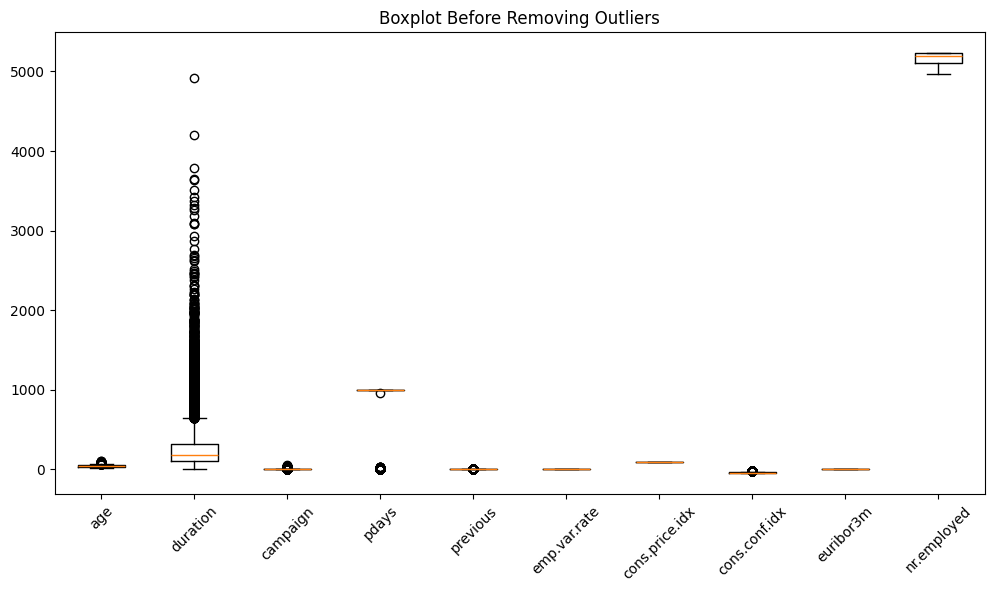

New Shape after removing outliers: (41176, 21)

=== Outliers Detection ===


C:\Users\USER\AppData\Local\Temp\ipykernel_11640\4127639080.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[num_cols], labels=num_cols)


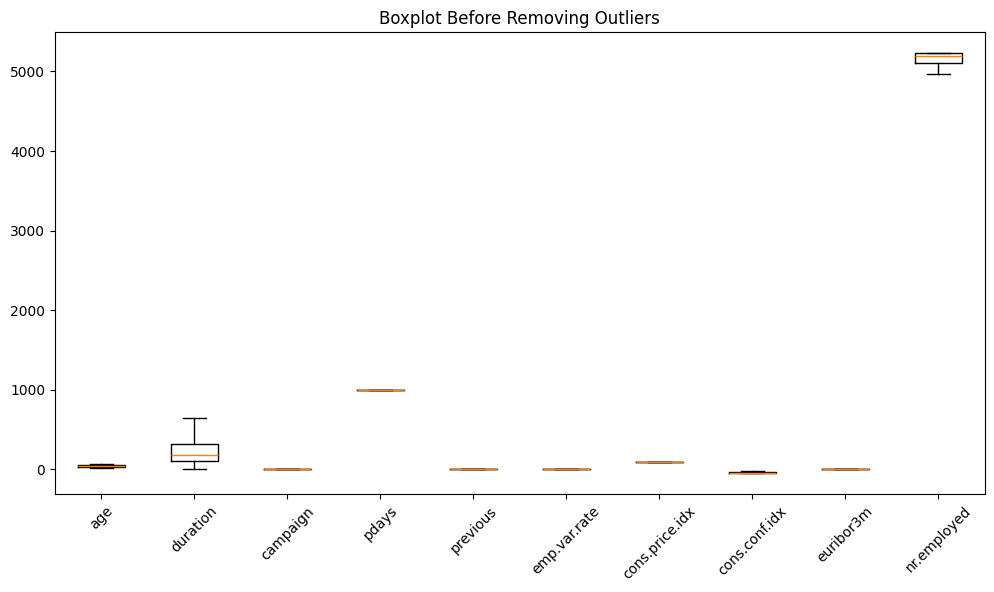

In [10]:
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Display outliers using box-plot
print("\nOutliers Detection")
plt.figure(figsize=(12,6))
plt.boxplot(df[num_cols], labels=num_cols)
plt.xticks(rotation=45)
plt.title("Boxplot Before Removing Outliers")
plt.show()

# Function for removing outliers
def cap_outliers_IQR(df, columns):
    # Copy dataframe
    new_df = df.copy()

    # cap outliers for all 
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        new_df[col] = np.clip(new_df[col], lower, upper)

    # Return new dataframe
    return new_df

# Cap outliers
df = cap_outliers_IQR(df, num_cols)
df.reset_index(drop=True, inplace=True)

# Display outliers after correction
print("New Shape after removing outliers:", df.shape)
print("\n=== Outliers Detection ===")
plt.figure(figsize=(12,6))
plt.boxplot(df[num_cols], labels=num_cols)
plt.xticks(rotation=45)
plt.title("Boxplot Before Removing Outliers")
plt.show()


### _Feature Encoding_


**6) Encoding Categorical Data**


_Data Preprocessing Steps (Simple Explanation)_

1- Select the target column
We store the subscribed column separately because we will encode it later.

2- Identify categorical and numerical features

3- Categorical columns: all object-type columns except the target.

4- Numerical columns: all integer and float columns.

5- Apply One-Hot Encoding to categorical features
We convert text categories into numeric dummy variables using OneHotEncoder, dropping the first category to avoid dummy variable trap.

6- Combine numerical features with the encoded categorical features
We merge them together into a new dataframe called df_encoded.

7- Add the target column back to the dataset
The target is reattached after encoding the features.

8- Encode the target column
We convert yes → 1 and no → 0.

9- Display the final processed dataset
Show the first few rows to confirm everything is correct.


In [11]:
# Select target
y = df['subscribed']

# Select categorical data except target
Cat = df.select_dtypes(include=['object']).columns.tolist()
if 'subscribed' in Cat:
    Cat.remove('subscribed')

# Select numeric data
Num = df.select_dtypes(include=['int64', 'float64']).columns

# Display info
print("\nEncoding Categorical Data ")
print("Categorical columns (excluding target):", Cat)
print("Numerical columns:", Num)

# Apply one hot encoding
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform selected columns
ohe_df = pd.DataFrame(ohe.fit_transform(df[Cat]), columns=ohe.get_feature_names_out(Cat))

# Join encoded columns into original DataFrame
df_encoded = pd.concat([df[Num].reset_index(drop=True), ohe_df], axis=1)

# Add target
df_encoded['subscribed'] = y.reset_index(drop=True)

# Print info
print("After encoding - Dataset shape:", df_encoded.shape)
print("Target column values:", df_encoded['subscribed'].value_counts())

# Apply label encoding on target
df_encoded['subscribed'] = df_encoded['subscribed'].map({'no': 0, 'yes': 1})

# Display result 
df_encoded.head()


Encoding Categorical Data 
Categorical columns (excluding target): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
After encoding - Dataset shape: (41176, 54)
Target column values: subscribed
no     36537
yes     4639
Name: count, dtype: int64


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed
0,56.0000,261.0000,1.0000,999.0000,0.0000,1.1000,93.9940,-36.4000,4.8570,5191.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0
1,57.0000,149.0000,1.0000,999.0000,0.0000,1.1000,93.9940,-36.4000,4.8570,5191.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0
2,37.0000,226.0000,1.0000,999.0000,0.0000,1.1000,93.9940,-36.4000,4.8570,5191.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0
3,40.0000,258.2864,1.0000,999.0000,0.0000,1.1000,93.9940,-36.4000,4.8570,5191.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0
4,56.0000,258.2864,1.0000,999.0000,0.0000,1.1000,93.9940,-36.4000,4.8570,5191.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0


### _Split to Train and Test_


**7) Split Data into Train/Test**


In [12]:
X = df_encoded.drop(columns=['subscribed'])
y = df_encoded['subscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTrain/Test Split")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"y_train unique values: {y_train.unique()}")


Train/Test Split
X_train: (32940, 53), X_test: (8236, 53)
y_train: (32940,), y_test: (8236,)
y_train unique values: [0 1]


**8) Select**


In [13]:
Num_list = ['age','duration','campaign','pdays','previous','emp.var.rate',
            'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
Num_list = [c for c in Num_list if c in X_train.columns]


### _Handling Imbalance_


**9) Detect Imbalance Data and Solve It**


_Class Balancing (Upsampling)_

- Before training the model, we need to check whether the dataset is balanced or not.
  If one class (e.g., “Not Subscribed”) has many more samples than the other (“Subscribed”),
  the model will learn to always predict the majority class.

Steps Performed:

1. Check class distribution before balancing
   We count how many samples belong to each class (0 = No, 1 = Yes).

2. Visualize the imbalance
   A bar plot is used to show the difference between the two class counts.

3. Combine X_train and y_train
   We merge the training features and target into one dataframe to prepare for resampling.

4. Separate majority and minority classes

   Class 0 → Not Subscribed

   Class 1 → Subscribed

5. Apply Upsampling to the minority class
   We duplicate (resample with replacement) samples from class 1 until both classes have the same size.

6. Create a balanced training dataset
   We combine the upsampled minority class with the majority class and shuffle the rows.

7. Split the balanced dataset back into X_train and y_train
   After balancing, we separate the features and target again.

8. Check class distribution after balancing
   We print the new counts to confirm both classes are now equal.

9. Visualize the balanced distribution
   Another bar chart is plotted to show the balanced dataset.



Class Distribution Before Balancing
Class 0 (No): 29272
Class 1 (Yes): 3668


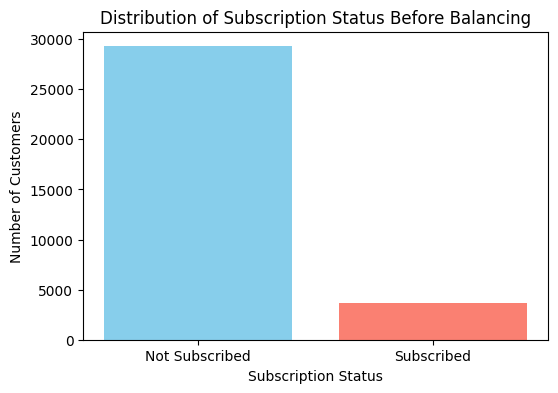


=== Class Distribution After Balancing ===
Class 0 (No): 29272
Class 1 (Yes): 29272


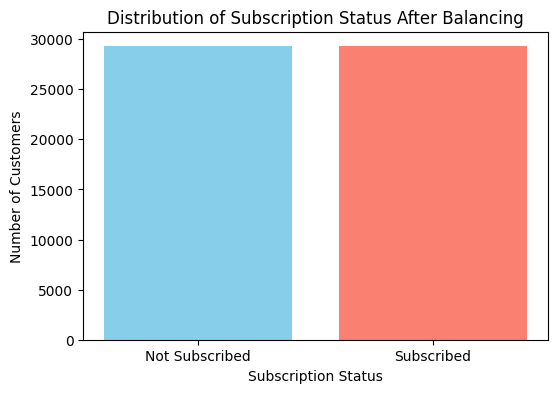

In [14]:
# Get and print info
print("\nClass Distribution Before Balancing")
target_counts = y_train.value_counts()
print("Class 0 (No):", target_counts[0])
print("Class 1 (Yes):", target_counts[1])

# Display distribution of classes
plt.figure(figsize=(6,4))
plt.bar(['Not Subscribed', 'Subscribed'], target_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Subscription Status')
plt.ylabel('Number of Customers')
plt.title('Distribution of Subscription Status Before Balancing')
plt.show()

# Upsampling
train_df = pd.concat([X_train, y_train], axis=1)
train_df.rename(columns={0: 'subscribed'}, inplace=True) if 'subscribed' not in train_df.columns else None

# Get classes
df_yes = train_df[train_df['subscribed'] == 1]
df_no = train_df[train_df['subscribed'] == 0]

# Resampling class 1
df_yes_up = resample(df_yes, replace=True, n_samples=len(df_no), random_state=42)
train_balanced = pd.concat([df_no, df_yes_up]).sample(frac=1, random_state=42)

# Split it again
X_train = train_balanced.drop(columns=['subscribed'])
y_train = train_balanced['subscribed']

# Count occurance of each class
print("\n=== Class Distribution After Balancing ===")
balanced_counts = y_train.value_counts()
print("Class 0 (No):", balanced_counts[0])
print("Class 1 (Yes):", balanced_counts[1])

# Display distribution of classes
plt.figure(figsize=(6,4))
plt.bar(['Not Subscribed', 'Subscribed'], balanced_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Subscription Status')
plt.ylabel('Number of Customers')
plt.title('Distribution of Subscription Status After Balancing')
plt.show()

### _Scalling_


**10) Feature Scaling**


_Feature Scaling (Standardization)_

- Feature scaling is an important preprocessing step to ensure that all numerical features
  have the same scale. This helps machine-learning models perform better, especially
  distance-based models and gradient-based algorithms.

Steps Performed:

1- Choose the numeric columns that need scaling

2- Create a StandardScaler object
StandardScaler transforms values so that each feature has:

Mean = 0

Standard deviation = 1

3- Fit the scaler on the training data and transform it
The scaler learns the distribution (mean & std) from training data only.

4- Transform the test data using the same scaler
We apply the same scaler to test data without fitting again
to avoid data leakage.

5- Display the shapes of the scaled data
Just to confirm the transformation worked correctly.


In [15]:
# Columns that I need to scale it
column_for_scalling = ['age','duration','campaign','pdays','previous','emp.var.rate',
                        'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

# Scaler instance
scaler = StandardScaler()

# Fit and transfrom
X_train[column_for_scalling] = scaler.fit_transform(X_train[column_for_scalling])
X_test[column_for_scalling] = scaler.transform(X_test[column_for_scalling])

print("\nAfter Feature Scaling")
print("X_train scaled shape:", X_train.shape)
print("X_test scaled shape:", X_test.shape)


After Feature Scaling
X_train scaled shape: (58544, 53)
X_test scaled shape: (8236, 53)


# **_Model_**


**11) Model Building - Training**


In [16]:
# KNN Classifier
print("\nTraining KNN Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


Training KNN Classifier


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
# Naive Bayes Classifier
print("\nTraining Naive Bayes Classifier")
nb = GaussianNB()
nb.fit(X_train, y_train)


Training Naive Bayes Classifier


,priors,None
,var_smoothing,1e-09


**12) Model Building - Predict Test Set**


In [18]:
print("MODEL PREDICTION PHASE")
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)
print("Predictions completed for all models")

MODEL PREDICTION PHASE
Predictions completed for all models


**13) Visualization - Train Data**



Training Data Visualization


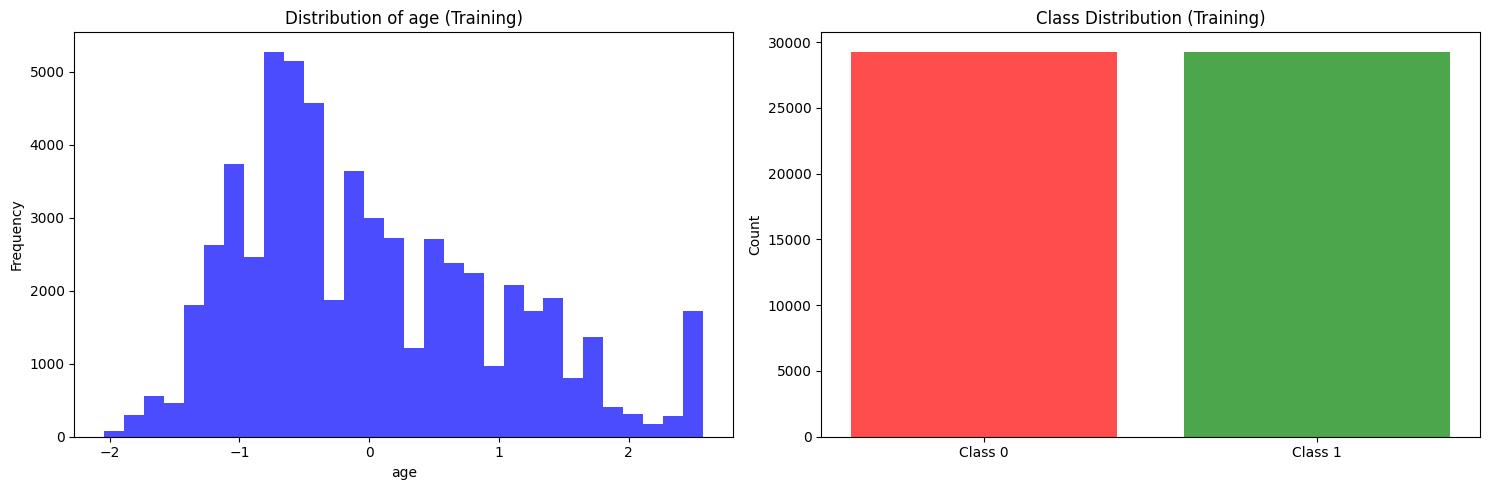

In [19]:
print("\nTraining Data Visualization")
plt.figure(figsize=(15, 5))

# Feature distribution after scaling
plt.subplot(1, 2, 1)
plt.hist(X_train[Num_list[0]], bins=30, alpha=0.7, color='blue')
plt.title(f'Distribution of {Num_list[0]} (Training)')
plt.xlabel(Num_list[0])
plt.ylabel('Frequency')

# Class distribution
plt.subplot(1, 2, 2)
plt.bar(['Class 0', 'Class 1'], [balanced_counts[0], balanced_counts[1]], 
        color=['red', 'green'], alpha=0.7)
plt.title('Class Distribution (Training)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**14) Visualization - Test Data**



Test Data Visualization


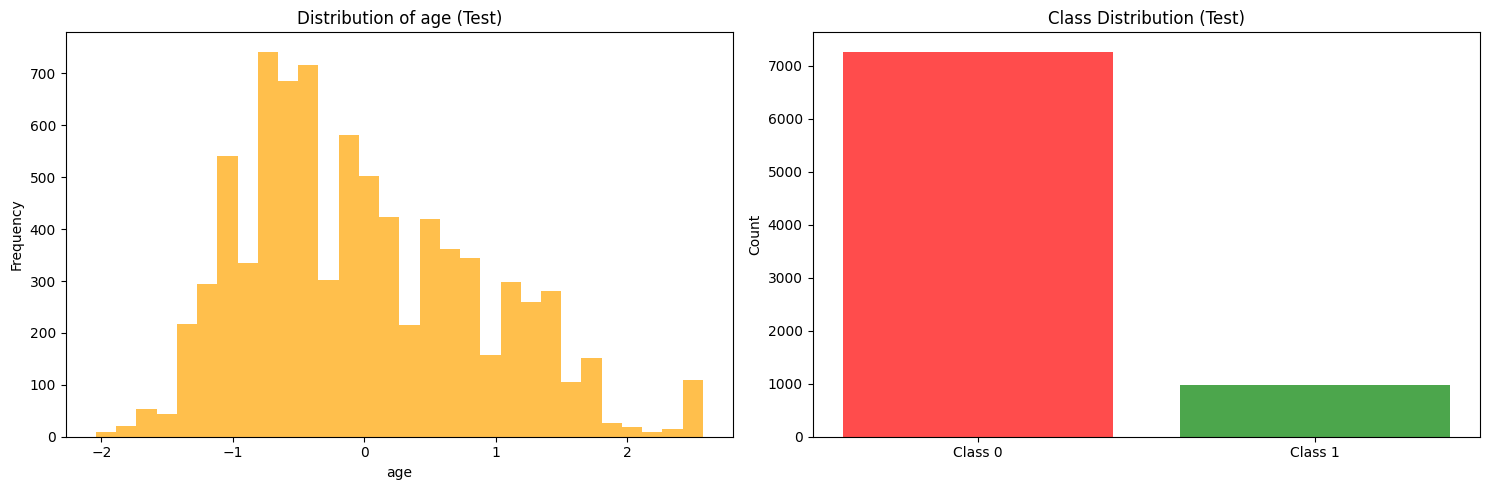

In [20]:
print("\nTest Data Visualization")
plt.figure(figsize=(15, 5))

# Feature distribution in test set
plt.subplot(1, 2, 1)
plt.hist(X_test[Num_list[0]], bins=30, alpha=0.7, color='orange')
plt.title(f'Distribution of {Num_list[0]} (Test)')
plt.xlabel(Num_list[0])
plt.ylabel('Frequency')

# Actual class distribution in test set
plt.subplot(1, 2, 2)
test_counts = y_test.value_counts()
plt.bar(['Class 0', 'Class 1'], [test_counts[0], test_counts[1]], 
        color=['red', 'green'], alpha=0.7)
plt.title('Class Distribution (Test)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# **_Evaluation_**


**15) Model Comparison**


_Model Accuracy Comparison_

After training different machine-learning models, we need to evaluate their performance
to understand which model works best.

Steps Performed:

1- Store the predictions of each model
We collect the predicted labels from:

    KNN

    Naive Bayes



2- Calculate accuracy for each model
Using accuracy_score, we compare predicted values with the actual test labels
to compute the accuracy.

3- Save all accuracy scores
We store the results in a dictionary for easy visualization.

4- Plot a bar chart for comparison
A bar graph is created to clearly show which model has the highest accuracy.
Accuracy values are also displayed above each bar.

5- Interpretation
This visualization helps us quickly identify the best-performing model


MODEL COMPARISON


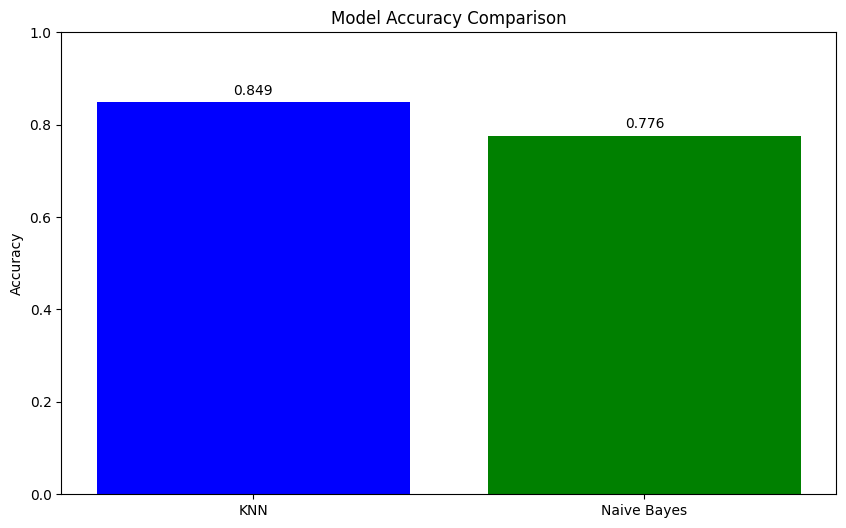

In [21]:
print("MODEL COMPARISON")

models = {
    'KNN': y_pred_knn,
    'Naive Bayes': y_pred_nb
}

accuracies = {}
for name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.show()


**17) Evaluation**


MODEL EVALUATION

KNN Evaluation
Confusion Matrix:
[[6268  997]
 [ 250  721]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7265
           1       0.42      0.74      0.54       971

    accuracy                           0.85      8236
   macro avg       0.69      0.80      0.72      8236
weighted avg       0.90      0.85      0.87      8236

Accuracy: 0.8486


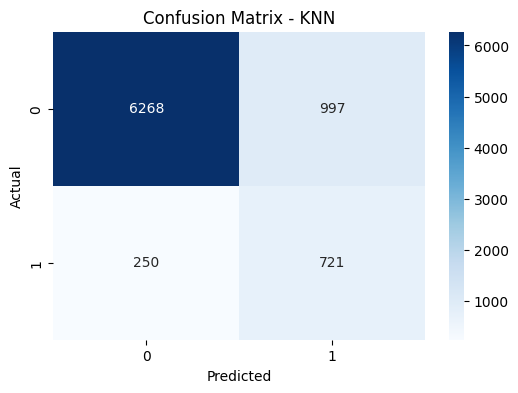


Naive Bayes Evaluation
Confusion Matrix:
[[5672 1593]
 [ 255  716]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      7265
           1       0.31      0.74      0.44       971

    accuracy                           0.78      8236
   macro avg       0.63      0.76      0.65      8236
weighted avg       0.88      0.78      0.81      8236

Accuracy: 0.7756


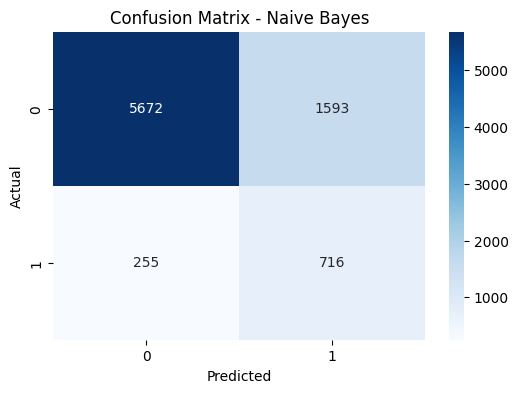

In [22]:

print("MODEL EVALUATION")
for name, y_pred in models.items():
    print(f"\n{name} Evaluation")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Finally, we suggest using the KNN model


Predict New Customer Subscription – Steps

- Step 1: Define numeric and categorical features (must match training data).

- Step 2: Get input for a new customer (or use sample data).

- Step 3: Create a DataFrame with proper columns.

- Step 4: Convert numeric columns and handle missing values.

- Step 5: Encode categorical features with the trained OneHotEncoder.

- Step 6: Combine numeric and encoded categorical features.

- Step 7: Ensure column order matches the training data.

- Step 8: Scale numeric features with the same scaler.

- Step 9: Predict subscription using the trained KNN model.

- Step 10: Display prediction, probability, and recommendation.


In [23]:
Cat_features = ['job','marital','education','default','housing','loan',
                'contact','poutcome','month','day_of_week']

numeric_cols = ["age","campaign","pdays","previous","duration",
                "emp.var.rate","cons.price.idx","cons.conf.idx",
                "euribor3m","nr.employed"]

# Sample input for testing
sample_input = "56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,may,mon,1.1,93.994,-36.4,4.857,5191.0"

# Get user input
while True:
    row_input = input("Enter customer features (20 values, comma-separated) or press Enter to use sample: ")
    
    if row_input.strip() == "":
        print("No input entered! Using sample data...")
        values = sample_input.split(",")
        break
    else:
        values = row_input.strip().split(",")
        if len(values) != 20:
            print(f" Expected 20 values, got {len(values)}. Please try again.\n")
            continue
        break

# Original columns from the dataset (check your CSV header)
columns = ["age","job","marital","education","default","housing","loan",
            "contact","duration","campaign","pdays","previous",
            "poutcome","month","day_of_week",
            "emp.var.rate","cons.price.idx","cons.conf.idx",
            "euribor3m","nr.employed"]

# Create DataFrame with proper column names
new_data = pd.DataFrame([values], columns=columns)

# Convert numeric columns
new_data[numeric_cols] = new_data[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Handle missing numeric values
for col in numeric_cols:
    if pd.isna(new_data[col].iloc[0]):
        new_data[col] = X_train[col].mean()


# Use the original Cat variable (from encoding step) instead of Cat_features
if 'Cat' not in locals():
    # If Cat variable is not available, use the same list from encoding step
    Cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
            'contact', 'poutcome', 'month', 'day_of_week']


for col in Cat:
    print(f"  {col}: {new_data[col].iloc[0]}")

# Transform categorical features - USE THE SAME ORDER AS DURING TRAINING
try:
    new_cat = ohe.transform(new_data[Cat])
    new_ohe_df = pd.DataFrame(new_cat, columns=ohe.get_feature_names_out(Cat))
    print(" Categorical encoding successful!")
except ValueError as e:
    print(f" Encoding error: {e}")
    print("\nChecking for unknown categories...")
    
    # Check for unknown categories
    for col in Cat:
        unique_train = set(ohe.categories_[list(ohe.feature_names_in_).index(col)])
        if new_data[col].iloc[0] not in unique_train:
            print(f"  Unknown category in '{col}': '{new_data[col].iloc[0]}'")
            print(f"  Expected one of: {list(unique_train)}")
    
    # Handle unknown categories
    for col in Cat:
        unique_train = set(ohe.categories_[list(ohe.feature_names_in_).index(col)])
        if new_data[col].iloc[0] not in unique_train:
            print(f"  Replacing '{new_data[col].iloc[0]}' with most frequent")
            new_data[col] = df[col].mode()[0]  # Use mode from original df
    
    # Try again
    new_cat = ohe.transform(new_data[Cat])
    new_ohe_df = pd.DataFrame(new_cat, columns=ohe.get_feature_names_out(Cat))

# Merge numeric and encoded categorical data
new_data_processed = pd.concat([new_data[numeric_cols], new_ohe_df], axis=1)

# Reorder columns to match training data
new_data_processed = new_data_processed[X_train.columns]

# Scale the numeric features
new_data_processed[Num_list] = scaler.transform(new_data_processed[Num_list])

# Make prediction
prediction = knn.predict(new_data_processed)
prediction_proba = knn.predict_proba(new_data_processed)

print("\n" + "="*60)
print("PREDICTION RESULTS")
print("="*60)
print(f"Predicted Subscription: {'YES (subscribed)' if prediction[0] == 1 else 'NO (not subscribed)'}")
print(f"Confidence: {max(prediction_proba[0]):.1%}")
print(f"Probability: Not Subscribe = {prediction_proba[0][0]:.2%}, Subscribe = {prediction_proba[0][1]:.2%}")

if prediction[0] == 1:
    print("\n Recommendation: This customer is likely to subscribe. Focus on closing the sale!")
else:
    print("\n Recommendation: This customer is unlikely to subscribe. Consider different marketing approach.")

No input entered! Using sample data...
  job: housemaid
  marital: married
  education: basic.4y
  default: no
  housing: no
  loan: no
  contact: telephone
  month: may
  day_of_week: mon
  poutcome: nonexistent
 Categorical encoding successful!

PREDICTION RESULTS
Predicted Subscription: NO (not subscribed)
Confidence: 100.0%
Probability: Not Subscribe = 100.00%, Subscribe = 0.00%

 Recommendation: This customer is unlikely to subscribe. Consider different marketing approach.
